<a href="https://colab.research.google.com/github/ReginaFierro2000/Artificial-intelligence/blob/main/Project2_TravelingSalesman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [2]:
#Create class to handle "cities"

class City:
    def __init__(self,name, x, y):
        self.name = name
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.name)+ ")"


In [3]:
#Create a fitness function

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [4]:
#Create our initial population
#Route generator
#This method randomizes the order of the cities, this mean that this method creates a random individual.
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route


#Create first "population" (list of routes)
#This method created a random population of the specified size.

def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population


#Create the genetic algorithm
#Rank individuals
#This function takes a population and orders it in descending order using the fitness of each individual
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    sorted_results=sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_results



#Create a selection function that will be used to make the list of parent routes

def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults



#Create mating pool

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool




#Create a crossover function for two parents to create one child
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        

    childP2 = [item for item in parent2 if item not in childP1]
    print(startGene, endGene)

    print(parent1)
    print(parent2)

    print(childP1)
    print(childP2)
    child = childP1 + childP2

    print(child)
    return child

#Create function to run crossover over full mating pool

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children




#Create function to mutate a single route
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual



#Create function to run mutation over entire population

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop



#Put all steps together to create the next generation

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [5]:
#Final step: create the genetic algorithm

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = [1 / rankRoutes(pop)[0][1]]
    print("Initial distance: " + str(progress[0]))
    
    for i in range(1, generations+1):
        
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
        if i%50==0:
          print('Generation '+str(i),"Distance: ",progress[i])
        
        
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.title('Best Fitness vs Generation')
    plt.tight_layout()
    plt.show()

    
    
    return bestRoute

Initial distance: 361.8179282576872
0 2
[(4), (1), (0), (3), (2)]
[(4), (3), (2), (1), (0)]
[(4), (1)]
[(3), (2), (0)]
[(4), (1), (3), (2), (0)]
0 3
[(4), (2), (0), (1), (3)]
[(1), (3), (0), (2), (4)]
[(4), (2), (0)]
[(1), (3)]
[(4), (2), (0), (1), (3)]
2 3
[(3), (4), (2), (1), (0)]
[(1), (2), (4), (3), (0)]
[(2)]
[(1), (4), (3), (0)]
[(2), (1), (4), (3), (0)]
1 1
[(4), (2), (0), (1), (3)]
[(3), (4), (2), (0), (1)]
[]
[(3), (4), (2), (0), (1)]
[(3), (4), (2), (0), (1)]
2 3
[(3), (0), (2), (4), (1)]
[(2), (0), (3), (1), (4)]
[(2)]
[(0), (3), (1), (4)]
[(2), (0), (3), (1), (4)]
0 1
[(2), (0), (1), (4), (3)]
[(3), (4), (2), (1), (0)]
[(2)]
[(3), (4), (1), (0)]
[(2), (3), (4), (1), (0)]
0 1
[(0), (2), (1), (4), (3)]
[(1), (0), (2), (3), (4)]
[(0)]
[(1), (2), (3), (4)]
[(0), (1), (2), (3), (4)]
0 1
[(2), (0), (1), (4), (3)]
[(0), (4), (2), (1), (3)]
[(2)]
[(0), (4), (1), (3)]
[(2), (0), (4), (1), (3)]
1 3
[(4), (3), (2), (1), (0)]
[(4), (2), (1), (3), (0)]
[(3), (2)]
[(4), (1), (0)]
[(3), (

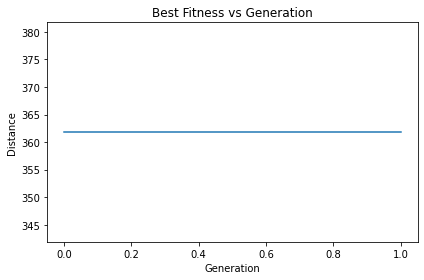

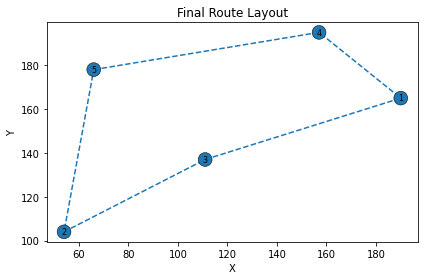

In [14]:
#Running the genetic algorithm
#Create list of cities

cityList = []

for i in range(0,5):
    cityList.append(City(name = i, x=int(random.random() * 200), y=int(random.random() * 200)))


best_route=geneticAlgorithm(population=cityList, popSize=30, eliteSize=20, mutationRate=0.01, generations=1)
x=[]
y=[]
for i in best_route:
  x.append(i.x)
  y.append(i.y)
x.append(best_route[0].x)
y.append(best_route[0].y)
plt.plot(x, y, '--o')
plt.xlabel('X')
plt.ylabel('Y')
ax=plt.gca()
plt.title('Final Route Layout')
bbox_props = dict(boxstyle="circle,pad=0.3", fc='C0', ec="black", lw=0.5)
for i in range(1,len(cityList)+1):
  ax.text(cityList[i-1].x, cityList[i-1].y, str(i), ha="center", va="center",
            size=8,
            bbox=bbox_props)
plt.tight_layout()
plt.show()